In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('../data/pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
 diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
 cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

/Users/sridhariyer/anaconda/envs/srienv/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [10]:
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

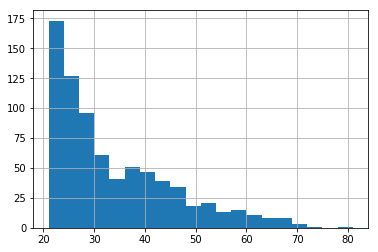

In [12]:
diabetes['Age'].hist(bins=20)

In [13]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [14]:
feature_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, age_bucket]

## Train Test Split

In [17]:
x_data = diabetes.drop('Class', axis=1)

In [18]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [21]:
labels = diabetes['Class']

In [22]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33, random_state=101)

## Labels

In [25]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, 
                                                 num_epochs=1000, shuffle=True)

In [26]:
model = tf.estimator.LinearClassifier(feature_columns=feature_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_train_distribute': None, '_evaluation_master': '', '_num_ps_replicas': 0, '_service': None, '_save_summary_steps': 100, '_model_dir': '/var/folders/c5/d8zsz0ss5_54lsffwtj6ph5r0000gn/T/tmp5q0t90e4', '_save_checkpoints_secs': 600, '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_master': '', '_global_id_in_cluster': 0, '_is_chief': True, '_device_fn': None, '_task_id': 0, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11397fa90>, '_task_type': 'worker', '_session_config': None}


In [27]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/c5/d8zsz0ss5_54lsffwtj6ph5r0000gn/T/tmp5q0t90e4/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 244.861
INFO:tensorflow:loss = 5.946883, step = 101 (0.412 sec)
INFO:tensorflow:global_step/sec: 373.427
INFO:tensorflow:loss = 5.9576225, step = 201 (0.264 sec)
INFO:tensorflow:global_step/sec: 349.278
INFO:tensorflow:loss = 5.5908556, step = 301 (0.291 sec)
INFO:tensorflow:global_step/sec: 363.616
INFO:tensorflow:loss = 3.569632, step = 401 (0.274 sec)
INFO:tensorflow:global_step/sec: 365.358
INFO:tensorflow:loss = 4.7100277, step = 501 (0.273 sec)
INFO:tensorflow:global_step/sec: 157.027
INFO:tensorflow:loss = 4.5987883, step = 601 (0.635 sec)
INFO:tensorflow:

In [29]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

In [30]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-02-18:22:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/c5/d8zsz0ss5_54lsffwtj6ph5r0000gn/T/tmp5q0t90e4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-02-18:22:31
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72440946, accuracy_baseline = 0.65748036, auc = 0.7831922, auc_precision_recall = 0.6285515, average_loss = 0.5327272, global_step = 1000, label/mean = 0.34251967, loss = 5.2043347, precision = 0.6103896, prediction/mean = 0.36404666, recall = 0.54022986
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/c5/d8zsz0ss5_54lsffwtj6ph5r0000gn/T/tmp5q0t90e4/model.ckpt-1000


In [31]:
results

{'accuracy': 0.72440946,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7831922,
 'auc_precision_recall': 0.6285515,
 'average_loss': 0.5327272,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2043347,
 'precision': 0.6103896,
 'prediction/mean': 0.36404666,
 'recall': 0.54022986}

In [32]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

In [33]:
predictions = model.predict(pred_input_func)

In [34]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/c5/d8zsz0ss5_54lsffwtj6ph5r0000gn/T/tmp5q0t90e4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [36]:
my_pred[:10]

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5225561], dtype=float32),
  'logits': array([0.09028578], dtype=float32),
  'probabilities': array([0.47744387, 0.5225561 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6256921], dtype=float32),
  'logits': array([0.51377964], dtype=float32),
  'probabilities': array([0.37430793, 0.6256921 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.40938935], dtype=float32),
  'logits': array([-0.3664903], dtype=float32),
  'probabilities': array([0.5906106 , 0.40938935], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.286899], dtype=float32),
  'logits': array([-0.9104929], dtype=float32),
  'probabilities': array([0.713101, 0.286899], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),

## Dense Neural Network Classifiers

In [43]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], 
                                       feature_columns=feature_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_train_distribute': None, '_evaluation_master': '', '_num_ps_replicas': 0, '_service': None, '_save_summary_steps': 100, '_model_dir': '/var/folders/c5/d8zsz0ss5_54lsffwtj6ph5r0000gn/T/tmpxi85dmte', '_save_checkpoints_secs': 600, '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_master': '', '_global_id_in_cluster': 0, '_is_chief': True, '_device_fn': None, '_task_id': 0, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1291e8ba8>, '_task_type': 'worker', '_session_config': None}


In [44]:
 dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _HashedCategoricalColumn(key='Group', hash_bucket_size=10, dtype=tf.string)

In [45]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [51]:
feature_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, 
                embedded_group_col,
                age_bucket]

In [52]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10,
                                                 num_epochs=1000, shuffle=True)

In [57]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20, 20, 20,10,10], 
                                       feature_columns=feature_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_train_distribute': None, '_evaluation_master': '', '_num_ps_replicas': 0, '_service': None, '_save_summary_steps': 100, '_model_dir': '/var/folders/c5/d8zsz0ss5_54lsffwtj6ph5r0000gn/T/tmphidzg4gc', '_save_checkpoints_secs': 600, '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_master': '', '_global_id_in_cluster': 0, '_is_chief': True, '_device_fn': None, '_task_id': 0, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12917f208>, '_task_type': 'worker', '_session_config': None}


In [58]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/c5/d8zsz0ss5_54lsffwtj6ph5r0000gn/T/tmphidzg4gc/model.ckpt.
INFO:tensorflow:loss = 7.0181603, step = 1
INFO:tensorflow:global_step/sec: 206.976
INFO:tensorflow:loss = 5.884424, step = 101 (0.486 sec)
INFO:tensorflow:global_step/sec: 332.042
INFO:tensorflow:loss = 5.627302, step = 201 (0.299 sec)
INFO:tensorflow:global_step/sec: 363.564
INFO:tensorflow:loss = 4.2448773, step = 301 (0.281 sec)
INFO:tensorflow:global_step/sec: 382.96
INFO:tensorflow:loss = 4.715237, step = 401 (0.257 sec)
INFO:tensorflow:global_step/sec: 341.219
INFO:tensorflow:loss = 4.480382, step = 501 (0.291 sec)
INFO:tensorflow:global_step/sec: 407.097
INFO:tensorflow:loss = 4.505695, step = 601 (0.245 sec)
INFO:tensorflow:glo

In [59]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test,batch_size=10,num_epochs=1,shuffle=False )

In [60]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-02-19:06:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/c5/d8zsz0ss5_54lsffwtj6ph5r0000gn/T/tmphidzg4gc/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-02-19:06:22
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7519685, accuracy_baseline = 0.65748036, auc = 0.8262441, auc_precision_recall = 0.6918307, average_loss = 0.49163327, global_step = 1000, label/mean = 0.34251967, loss = 4.802879, precision = 0.62765956, prediction/mean = 0.3648035, recall = 0.6781609
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/c5/d8zsz0ss5_54lsffwtj6ph5r0000gn/T/tmphidzg4gc/model.ckpt-1000


{'accuracy': 0.7519685,
 'accuracy_baseline': 0.65748036,
 'auc': 0.8262441,
 'auc_precision_recall': 0.6918307,
 'average_loss': 0.49163327,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.802879,
 'precision': 0.62765956,
 'prediction/mean': 0.3648035,
 'recall': 0.6781609}